In [34]:
import os 
import polars as pl
from importlib import reload as r
import pickle
import visualisation
from datetime import date
r(visualisation)
from functools import reduce
from visualisation import plot_multiline_chart
from utils.get_data import TimeSeries

def filter_uppercase(s):
    return ''.join([c for c in s if c.isupper()])
def reduce_join (list_of_data: list, on: str):
    return reduce(lambda x,y: x.join(y, on=on, how="inner"), list_of_data)




## Oil Market Related Data

In [3]:
with open("data/oil_market.pkl", "rb") as f:
    oil_market_data = pickle.load(f)
oil_market_data = [pl.DataFrame(d).select(["period", "value"]).rename({"value": d['seriesDescription'].unique().item()}).with_columns(pl.col('period').str.to_date("%Y-%m")).filter(pl.col('period')>date(2003,2,1)) for d in oil_market_data]
oil_market_data =  reduce_join([d for d in oil_market_data], on="period")
oil_market_data.tail()

period,Total non-OPEC Liquids Petroleum Production,Total OPEC Petroleum Supply,"Liquid Fuels Consumption, Total OECD","Liquid Fuels Consumption, Total non-OECD",U.S. Crude Oil Production,Crude OIl Refinery Input,OECD End-of-period Commercial Crude Oil and Other Liquids Inventory,OPEC Total Spare Crude Oil Production Capacity,OPEC Total Crude Oil Production Capacity,"Net Inventory Withdrawals, Total Other OECD Crude Oil and Other Liquids","Net Inventory Withdrawals, Total Non-OECD Crude Oil and Other Liquids"
date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2003-07-01,50.423767,28.300441,48.81729,31.127138,5.498445,15.546,2610.785999,2.179302,27.339878,-0.617839,2.18251
2003-06-01,49.815246,28.074057,48.119533,30.827331,5.659077,15.62,2584.821001,2.138374,27.177749,-0.737567,2.690327
2003-05-01,49.877436,28.720351,47.51579,30.425602,5.663475,15.91,2541.263,1.185702,26.939523,-0.47629,1.007573
2003-04-01,50.062831,28.582918,48.385719,29.941029,5.725816,15.575,2493.210998,0.820811,26.383232,-0.284933,0.686065
2003-03-01,50.407735,29.375879,49.26385,30.37489,5.803461,14.933,2463.397002,0.957693,27.399329,-1.772806,2.080385


## Political Stability Data

In [4]:
macro_data = list(filter(lambda x: x.startswith("Political"), os.listdir("data")))
political_stability_data = reduce_join([pl.read_csv(f"data/{data}").rename({"value": filter_uppercase(data)}) for data in macro_data], "period")
political_stability_data = political_stability_data.with_columns(pl.col("period").str.to_date("%Y-%m-%d")).filter(pl.col('period')>date(2003,2,1))
political_stability_data.tail()

period,PSIAGO,PSIARE,PSIBRA,PSICAN,PSICHN,PSICOL,PSIDZA,PSIEGY,PSIGAB,PSIGNQ,PSIIRN,PSIIRQ,PSIKAZ,PSIKWT,PSILBN,PSILBR,PSILBY,PSILCA,PSIMEX,PSIMYS,PSINGA,PSINLD,PSINOR,PSIOMN,PSIQAT,PSIRUS,PSISAU,PSISDN,PSISYR,PSITKM,PSITTO,PSITUN,PSIUSA,PSIUZB,PSIVEN,PSIYEM
date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2018-01-01,-0.347751,0.689087,-0.45964,0.963774,-0.298642,-0.80696,-0.842122,-1.188101,-0.257414,-0.090242,-1.342144,-2.520958,-0.052699,0.090534,-1.621536,-0.203765,-2.434969,0.993263,-0.673981,0.247989,-2.097414,0.838097,1.120636,0.642036,0.649284,-0.538376,-0.660841,-1.821778,-2.736279,-0.012979,0.230617,-0.868219,0.386043,-0.30447,-1.351442,-2.996031
2019-01-01,-0.370095,0.667445,-0.714394,0.994818,-0.259811,-0.979467,-1.05583,-1.124602,-0.075141,-0.147936,-1.711465,-2.609148,-0.16798,0.175114,-1.672291,-0.339135,-2.565771,0.906494,-0.843629,0.146066,-1.933071,0.821221,1.141986,0.589169,0.684276,-0.551099,-0.623456,-1.696198,-2.730331,-0.17815,0.081537,-0.877073,0.117877,-0.296665,-1.539181,-2.770874
2020-01-01,-0.600726,0.592547,-0.445607,1.013105,-0.473099,-0.701151,-0.847814,-1.181912,-0.065802,-0.221583,-1.699162,-2.47469,-0.25763,0.22519,-1.621135,-0.314183,-2.462278,0.86466,-0.791369,0.124463,-1.891961,0.830864,1.221519,0.419729,0.669544,-0.667409,-0.650508,-1.657064,-2.711758,-0.201664,0.110377,-0.594331,-0.026929,-0.43671,-1.551987,-2.647646
2021-01-01,-0.709369,0.597461,-0.419697,0.962196,-0.516729,-0.954558,-0.992437,-1.032841,-0.075773,-0.202781,-1.584385,-2.384559,-0.231328,0.262983,-1.481945,-0.286362,-2.308346,0.831885,-0.688361,0.058754,-1.787299,0.892924,1.088475,0.431888,0.833261,-0.707902,-0.591131,-1.987572,-2.659493,-0.332011,0.239029,-0.756551,-0.014878,-0.252974,-1.453888,-2.58031
2022-01-01,-0.646241,0.700785,-0.331466,0.772814,-0.441074,-0.641926,-0.741772,-1.028057,0.069895,-0.074254,-1.586439,-2.473925,-0.356833,0.281217,-1.473512,-0.2916,-2.197963,0.869226,-0.69196,0.140358,-1.798141,0.717305,0.860958,0.529911,0.958558,-0.918995,-0.362989,-1.998894,-2.797252,-0.100281,0.357975,-0.596295,-0.036005,-0.196215,-1.256462,-2.47688


In [5]:
def interpolate_data (df, method:str):
    return pl.DataFrame(
        {
            "period": pl.date_range(df["period"].min(), df["period"].max(), '1d', eager=True).alias('period'),
        }
    ).join(df, on="period", how="left").with_columns(pl.exclude('period').interpolate("linear"))

In [6]:
oil_market_data_cleaned = interpolate_data(oil_market_data, "linear")

In [7]:
political_stability_data_cleaned = interpolate_data(political_stability_data, "linear")

In [11]:
sterilised_data = oil_market_data_cleaned.join(political_stability_data_cleaned, on='period')

In [13]:
sterilised_data.tail()

period,Total non-OPEC Liquids Petroleum Production,Total OPEC Petroleum Supply,"Liquid Fuels Consumption, Total OECD","Liquid Fuels Consumption, Total non-OECD",U.S. Crude Oil Production,Crude OIl Refinery Input,OECD End-of-period Commercial Crude Oil and Other Liquids Inventory,OPEC Total Spare Crude Oil Production Capacity,OPEC Total Crude Oil Production Capacity,"Net Inventory Withdrawals, Total Other OECD Crude Oil and Other Liquids","Net Inventory Withdrawals, Total Non-OECD Crude Oil and Other Liquids",PSIAGO,PSIARE,PSIBRA,PSICAN,PSICHN,PSICOL,PSIDZA,PSIEGY,PSIGAB,PSIGNQ,PSIIRN,PSIIRQ,PSIKAZ,PSIKWT,PSILBN,PSILBR,PSILBY,PSILCA,PSIMEX,PSIMYS,PSINGA,PSINLD,PSINOR,PSIOMN,PSIQAT,PSIRUS,PSISAU,PSISDN,PSISYR,PSITKM,PSITTO,PSITUN,PSIUSA,PSIUZB,PSIVEN,PSIYEM
date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2021-12-28,66.04847,32.214927,44.812674,53.081989,11.505363,15.504996,2644.664796,3.395806,30.095806,-0.151581,-0.785619,-0.646933,0.699653,-0.332433,0.774889,-0.441903,-0.645352,-0.744519,-1.028109,0.068299,-0.075662,-1.586417,-2.472945,-0.355458,0.281018,-1.473605,-0.291542,-2.199173,0.868817,-0.69192,0.139464,-1.798023,0.719229,0.863452,0.528837,0.957185,-0.916682,-0.365489,-1.99877,-2.795742,-0.10282,0.356671,-0.598051,-0.035773,-0.196837,-1.258626,-2.478014
2021-12-29,66.044127,32.219622,44.71174,53.058891,11.498964,15.495667,2644.831809,3.389355,30.089355,-0.224065,-0.807294,-0.64676,0.699936,-0.332191,0.774371,-0.441695,-0.644496,-0.743832,-1.028096,0.068698,-0.07531,-1.586422,-2.47319,-0.355802,0.281068,-1.473582,-0.291557,-2.198871,0.868919,-0.69193,0.139687,-1.798052,0.718748,0.862828,0.529106,0.957528,-0.91726,-0.364864,-1.998801,-2.79612,-0.102185,0.356997,-0.597612,-0.035831,-0.196681,-1.258085,-2.47773
2021-12-30,66.039783,32.224316,44.610806,53.035793,11.492565,15.486337,2644.998823,3.382903,30.082903,-0.296548,-0.828969,-0.646587,0.700219,-0.331949,0.773852,-0.441488,-0.643639,-0.743145,-1.028083,0.069097,-0.074958,-1.586428,-2.473435,-0.356146,0.281118,-1.473559,-0.291571,-2.198568,0.869021,-0.69194,0.139911,-1.798082,0.718267,0.862205,0.529374,0.957872,-0.917839,-0.364239,-1.998832,-2.796497,-0.101551,0.357323,-0.597173,-0.035889,-0.196526,-1.257544,-2.477447
2021-12-31,66.03544,32.229011,44.509872,53.012695,11.486166,15.477007,2645.165836,3.376452,30.076452,-0.369032,-0.850643,-0.646414,0.700502,-0.331708,0.773333,-0.441281,-0.642782,-0.742458,-1.02807,0.069496,-0.074606,-1.586434,-2.47368,-0.35649,0.281167,-1.473536,-0.291586,-2.198266,0.869124,-0.69195,0.140135,-1.798112,0.717786,0.861582,0.529643,0.958215,-0.918417,-0.363614,-1.998863,-2.796875,-0.100916,0.357649,-0.596734,-0.035947,-0.19637,-1.257003,-2.477164
2022-01-01,66.031097,32.233705,44.408938,52.989597,11.479767,15.467677,2645.33285,3.37,30.07,-0.441516,-0.872318,-0.646241,0.700785,-0.331466,0.772814,-0.441074,-0.641926,-0.741772,-1.028057,0.069895,-0.074254,-1.586439,-2.473925,-0.356833,0.281217,-1.473512,-0.2916,-2.197963,0.869226,-0.69196,0.140358,-1.798141,0.717305,0.860958,0.529911,0.958558,-0.918995,-0.362989,-1.998894,-2.797252,-0.100281,0.357975,-0.596295,-0.036005,-0.196215,-1.256462,-2.47688


In [26]:
oil_prices = TimeSeries("CL=F")

[*********************100%%**********************]  1 of 1 completed


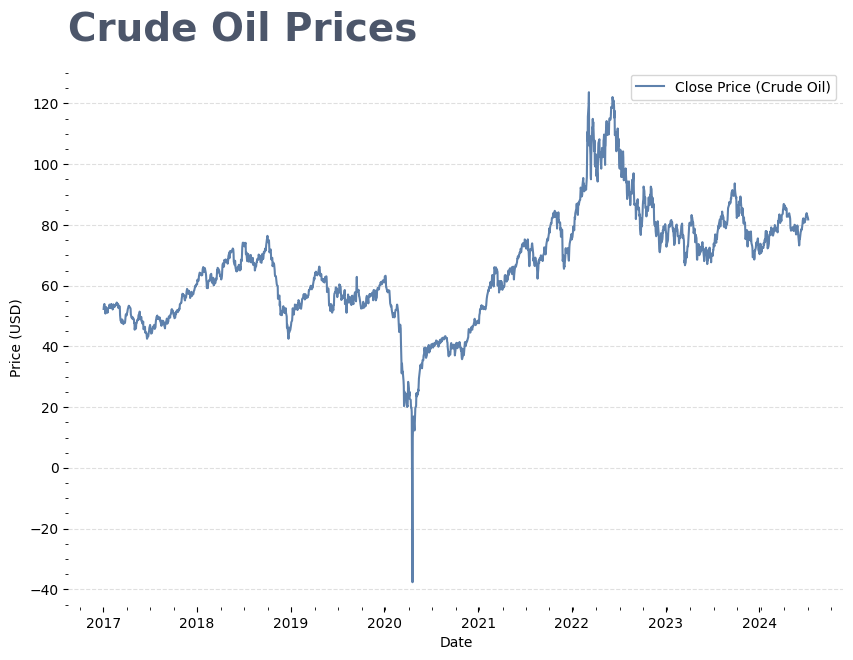

In [31]:
plot_multiline_chart([(oil_prices.data['Date'], oil_prices.data['Close'], 'Close Price (Crude Oil)')], title="Crude Oil Prices", x_label="Date", y_label="Price (USD)")

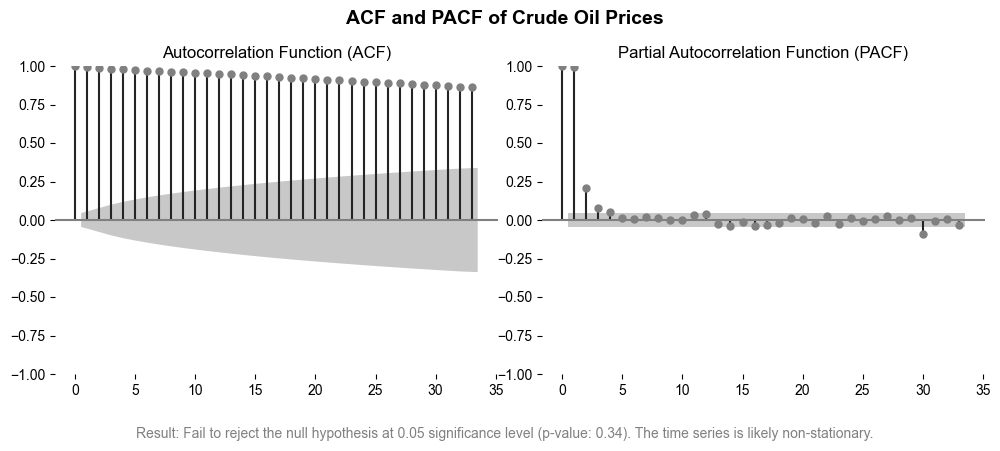

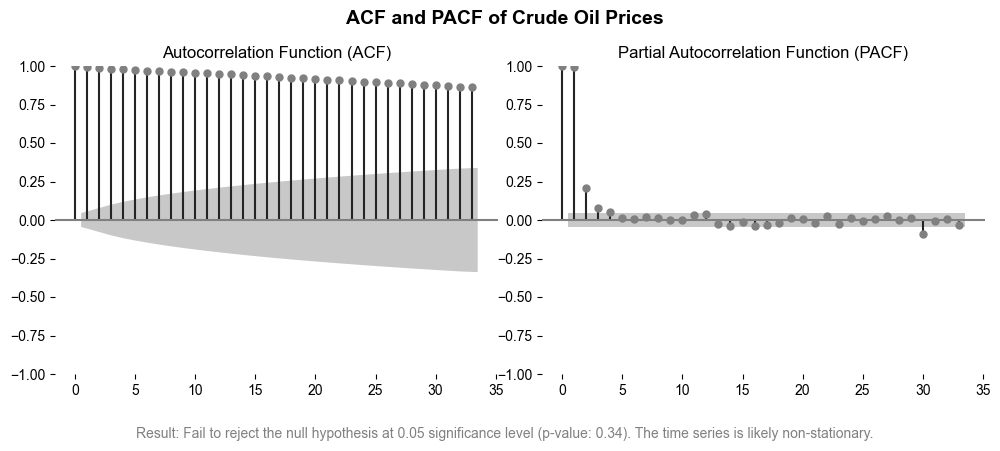

In [35]:
from visualisation import plot_acf_pacf_side_by_side
plot_acf_pacf_side_by_side(oil_prices.data['Close'], title="ACF and PACF of Crude Oil Prices")